## Regressão - Modelo Log-Linear

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto, o objetivo principal desse projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

***

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

***

In [2]:
# Importação das Bibliotecas:

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Leitura dos dados:

dados = pd.read_csv('data/dados_imob.csv', sep = ';')

In [4]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [5]:
# Verificando o tamanho do dataset:

dados.shape

(5000, 4)

### Análises Preliminares -  Estatísticas Descritivas

In [6]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [7]:
# MAtriz de Correlação:

dados.corr().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.00,0.71,-0.37,-0.02
Area,0.71,1.00,-0.28,-0.03
Dist_Praia,-0.37,-0.28,1.00,0.03
Dist_Farmacia,-0.02,-0.03,0.03,1.00


#### Os dados fornecidos pela matriz de correlação sugerem que:

* A variável 'Valor' tem relação positiva com a variável 'Area' e essa relação parece ser significativa;

* A variável 'Valor' tem relação negativa com a variável 'Dist_Praia'. Tal possível relação seria pertinente, tendo em vista que imóveis mais distantes da praia tendem a ter menor valor;

* A variável 'Valor' tem relação quase desprezível com a variável 'Dist_Farmácia'.

### Comportamento da variável dependente (y): Análise Gráfica

<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Reais'>

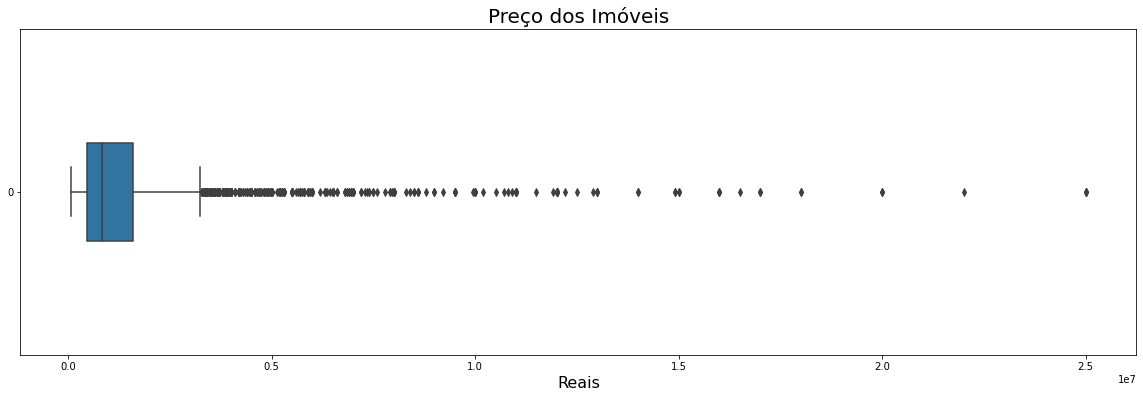

In [8]:
# Boxplot da variável dependente (y):

ax = sns.boxplot(data = dados['Valor'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

#### O boxplot sugere uma assimetria à direita.
#### Não se pode concluir que todos os pontos à direita sejam outliers.

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Count'>

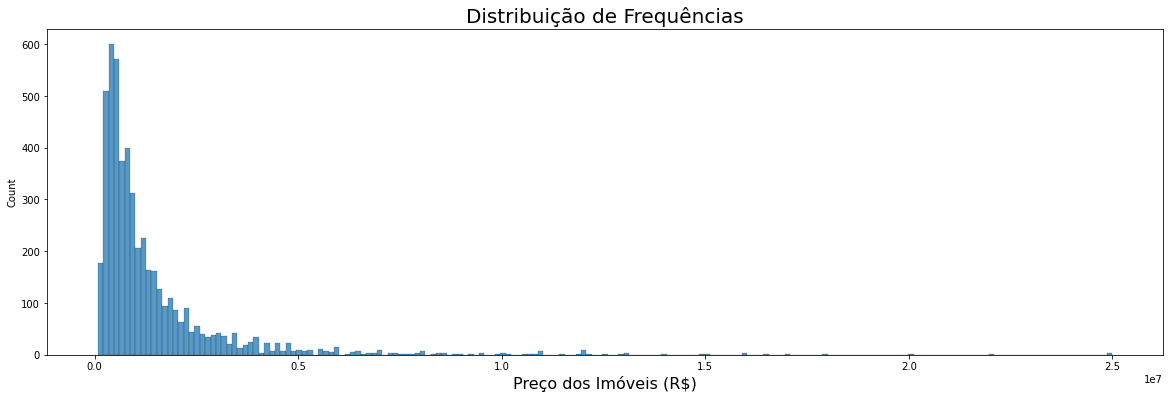

In [9]:
# Distribuição de feruências da variável dependente (y):

ax = sns.histplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

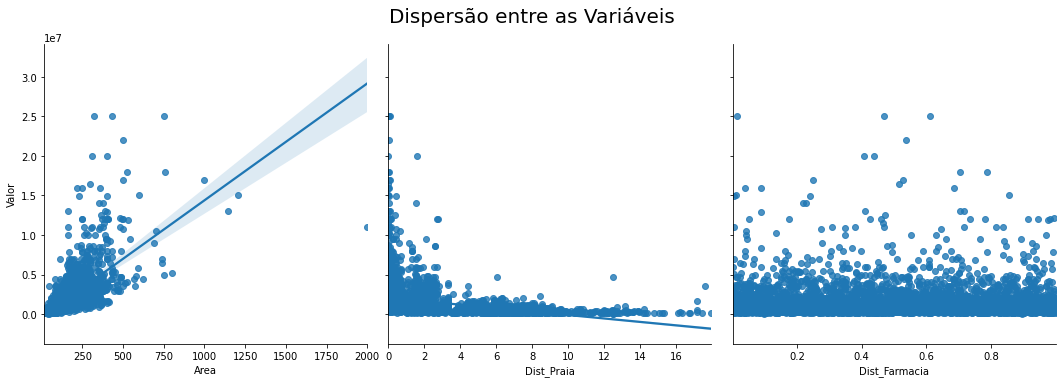

In [11]:
# Gráficos de dispersão entre as variáveis do dataset:

ax = sns.pairplot(dados, y_vars = 'Valor', x_vars = ['Area', 'Dist_Praia', 'Dist_Farmacia'],kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

### Pela análise gráfica acima, nota-se que:

* Existe a possibilidade de os dados estarem dispostos assimetricamente (Assimetria à direita - observar boxplot e distribuição de frequências da variável 'Valor')

* O relacionamento das variáveis independentes ('Area', 'Dist_Praia', Dist_Farmacia') não é o desejado.